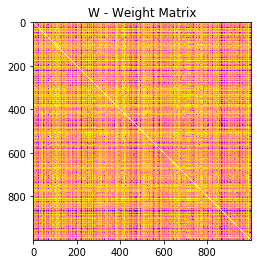

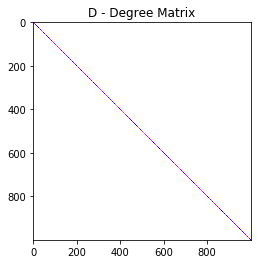

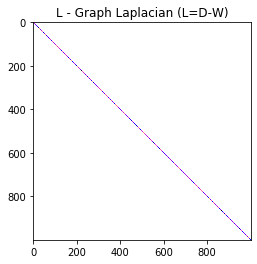

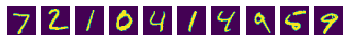

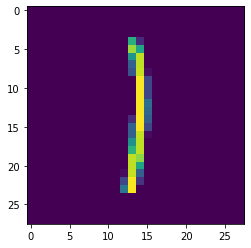

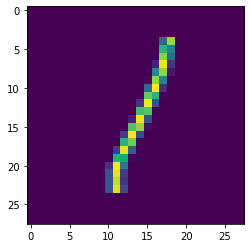

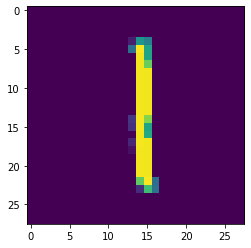

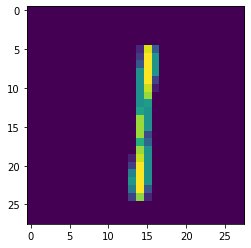

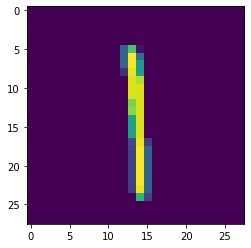

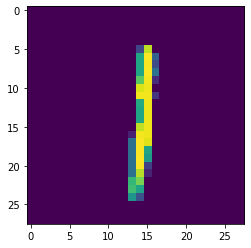

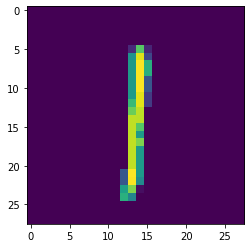

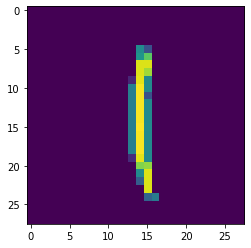

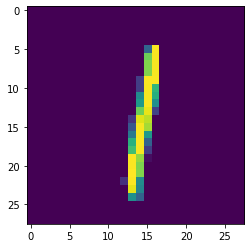

In [2]:
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd


########################
#       Setup etc      #
########################
k=10
#Functions 
def similarity(x,y):
    #return 1000/(linalg.norm((x-y),2))
    return linalg.norm(np.multiply(x,y), ord=0)
data = pd.read_csv("DataSets/MINST.txt", header=None, delim_whitespace=True)
x_list = []
for i, row in data.iterrows():
    x_list.append(np.array(row))

L,W,D = scplot.createMatrices(x_list[0:1000], similarity)



#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L)

U = e_vec[:,0:k]

T=U.copy()
for i in range(T.shape[1]):
    T[:,i] = T[:,i]/np.linalg.norm(T[:,i])
        
km = KMeans(n_clusters=k).fit(T)

imdict = {}
i = -1;
for l in km.labels_:
    i+=1
    if l not in imdict.keys():
        imdict[l] = [x_list[i]]
    else:
        imdict[l].append(x_list[i])
    
#print(len(km.labels_))
#print(km.labels_)

for k in imdict.keys():
#    print('==============\n',k,'=============\n')
    if len(imdict[k]) == 1:
        plt.imshow(imdict[k][0].reshape((28, 28)))
    else:
        fig, ax = plt.subplots(1, min(10, len(imdict[k])))
        #print(len(imdict[k]))
        for a in range(0,len(ax)):
            ax[a].imshow(imdict[k][a].reshape((28, 28)))
            ax[a].set_axis_off()
            a+=1
        
    plt.show()
    plt.close()




Interesting observation:

This is also affected by the number of eigen vectors used for clustering, the effects are similar to un-normalized version